# Будет ли дождь в Австралии. 
Попутно вы узнаете, какие факторы влияют на вероятность дождя — возможно, 

вы научитесь предсказывать его точнее, чем метеорологические службы, 

и больше никогда не окажетесь в нужный момент без зонта.

In [150]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output='pandas')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

sns.set_theme('notebook') 
sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (12, 8) 

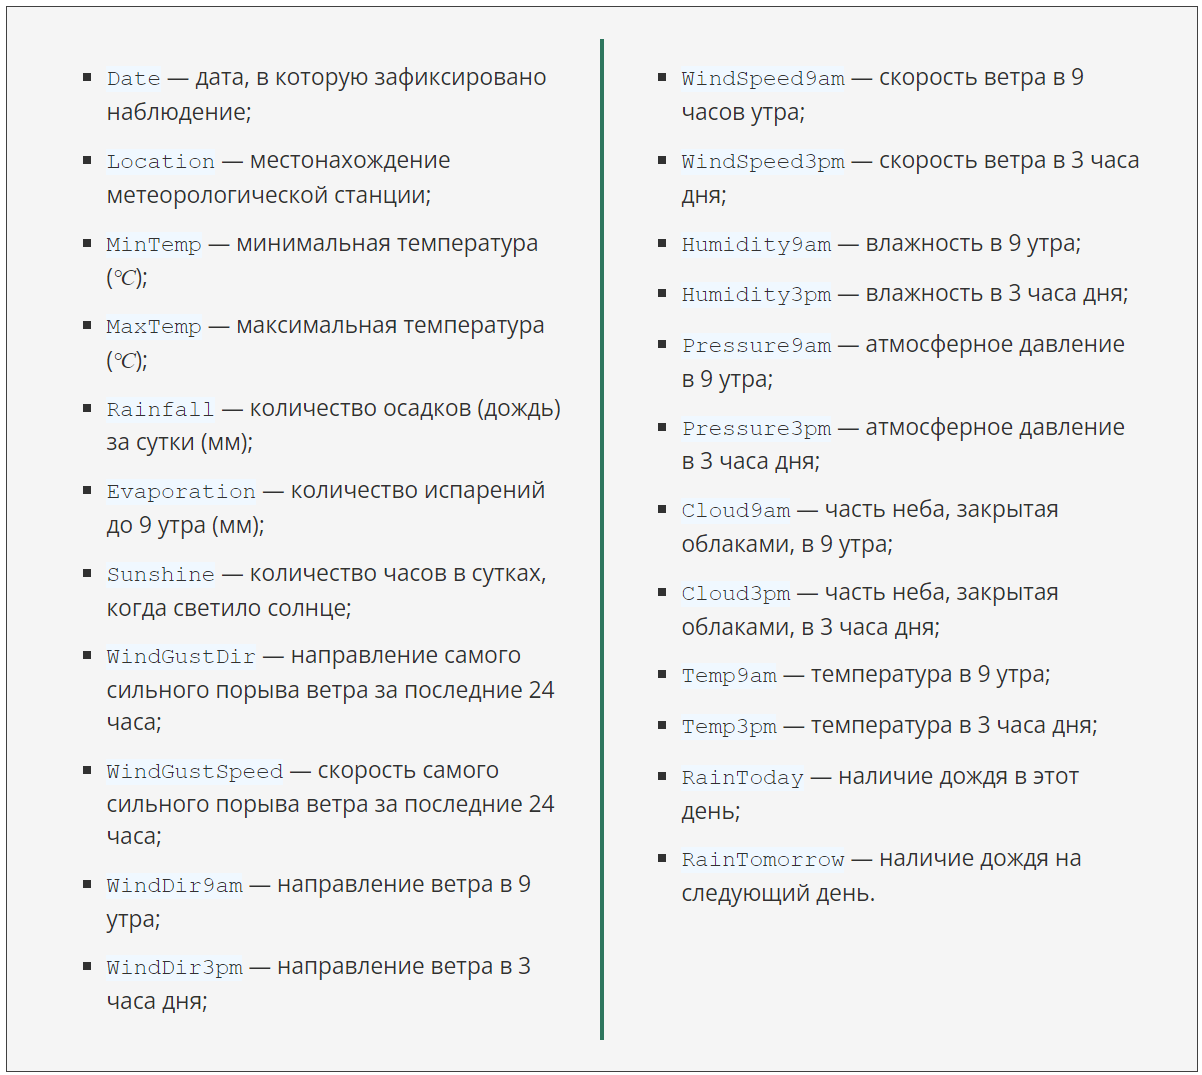

In [151]:
df = pd.read_csv('data/weatherAUS.zip')
TARGET = 'RainTomorrow'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [152]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [153]:
df.isnull().sum().sum()

343248

In [154]:
pd.DataFrame({'sum': df.isnull().sum(), 'mean': df.isnull().mean() * 100})

,sum,mean
Date,0,0.000000
Location,0,0.000000
MinTemp,1485,1.020899
MaxTemp,1261,0.866905
Rainfall,3261,2.241853
Evaporation,62790,43.166506
Sunshine,69835,48.009762
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
WindDir9am,10566,7.263853


In [155]:
mean_null = df.isnull().mean() * 100
col_to_drop = mean_null[mean_null > 40].index.to_list()
col_to_drop

['Evaporation', 'Sunshine', 'Cloud3pm']

In [156]:
df.drop(columns=col_to_drop, inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Cloud9am       89572 non-null   float64
 16  Temp9am        143693 non-null  float64
 17  Temp3pm        141851 non-nul

In [158]:
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

In [159]:
df['RainToday'].mean().round(2)

0.22

In [160]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.drop(columns='Date', inplace=True)

In [161]:
by_month = df.groupby(['Month', 'RainToday'])['Month'].count().unstack()
by_month.columns = ['No', 'Yes']
by_month['Rain_share'] = (by_month['Yes'] / by_month.sum(axis=1) * 100).round(2)
by_month

,No,Yes,Rain_share
Month,,,
1,10467,2447,18.95
2,8349,2176,20.67
3,10207,2831,21.71
4,8852,2451,21.68
5,10157,2901,22.22
6,9125,3267,26.36
7,8590,3189,27.07
8,8785,2978,25.32
9,8747,2600,22.91


In [162]:
df.describe(include='object')

,Location,WindGustDir,WindDir9am,WindDir3pm
count,145460,135134,134894,141232
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3436,9915,11758,10838


In [163]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
df = pd.get_dummies(df, columns=categoricals)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 124 entries, MinTemp to WindDir3pm_WSW
dtypes: bool(109), float64(15)
memory usage: 31.8 MB


In [165]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [166]:
X, y = df.drop(columns=TARGET), df[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [167]:
y_test.mean().round(2)

0.23

In [168]:
# Размер выборки
size = X_train.shape[0]

# количество бутсрап выборок
bootstaps_num = 1000
mean_min_temp = np.zeros(bootstaps_num)

np.random.seed(31)
MinTemp = X_train['MinTemp'].values

for i in range(bootstaps_num):
    # ренерирую массив всех индексов сразу
    ind = np.random.randint(0, size, size)
    # вычисляю среднее значение и сохраняю в массив
    mean_min_temp[i] = MinTemp[ind].mean()

In [169]:
mean_min_temp.std().round(2)

0.03

А вот еще расчет вручную стандартного отклонения, как корня из дисперсии

In [170]:
x = mean_min_temp

In [171]:
x2 = mean_min_temp * mean_min_temp

In [172]:
round((x2.mean() - (x.mean())**2)**(1/2), 2)

0.03

### Задание 4.8

Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров). Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее.

В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [173]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
lr = LogisticRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'ROC-AUC on TEST: {roc_auc_score(y_test, y_test_pred):.2f}')

### Задание 4.9

Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений.

С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:

Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию.

In [176]:
params = {'max_leaf_nodes': list(range(2, 10)),
          'min_samples_split': [2, 3, 4],
          'max_depth': [5, 7, 9, 11]}

In [181]:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=params, 
    cv=3, 
    n_jobs=-1, # использовать все ядра CPU
)

grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print(f'ROC-AUC on TRAIN: {roc_auc_score(y_train, y_train_pred):.2f}')
print(f'ROC-AUC on TEST: {roc_auc_score(y_test, y_test_pred):.2f}')
print()
print(f'Наилучшие значения гиперпараметров:\n{grid_search.best_params_}')

ROC-AUC on TRAIN: 0.70
ROC-AUC on TEST: 0.70

Наилучшие значения гиперпараметров:
{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}


### Задание 4.10

К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей.

Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию.

Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [183]:
rfc = estimator=RandomForestClassifier(n_estimators=100, random_state=31)

rfc.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'ROC-AUC on TEST: {roc_auc_score(y_test, y_test_pred):.2f}')

ROC-AUC on TEST: 0.73


### Задание 4.11

Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'.

Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:

{'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31. Остальные значения оставьте по умолчанию.

Какое значение roc_auc получилось для оптимальных гиперпараметров?

In [184]:
params = {'max_features': [4, 5, 6, 7],
          'min_samples_leaf': [3, 5, 7, 9, 11],
          'max_depth': [5, 10, 15]}

In [185]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(n_estimators=100, random_state=31),
    param_grid=params, 
    cv=3, 
    n_jobs=-1, # использовать все ядра CPU
)

grid_search.fit(X_train, y_train)
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

print(f'ROC-AUC on TRAIN: {roc_auc_score(y_train, y_train_pred):.2f}')
print(f'ROC-AUC on TEST: {roc_auc_score(y_test, y_test_pred):.2f}')
print()
print(f'Наилучшие значения гиперпараметров:\n{grid_search.best_params_}')

ROC-AUC on TRAIN: 0.75
ROC-AUC on TEST: 0.70

Наилучшие значения гиперпараметров:
{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}


In [197]:
pd.DataFrame({'importance': grid_search.best_estimator_.feature_importances_}, 
             index=X_train.columns).sort_values('importance', ascending=False).iloc[:3]

,importance
Humidity3pm,0.250783
Rainfall,0.079757
Humidity9am,0.070403
